### Code of Ridge Regression from scratch 

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
X, Y = make_regression(n_samples = 200, n_features = 1, n_targets = 1, n_informative= 1, random_state = 42,noise= 20)

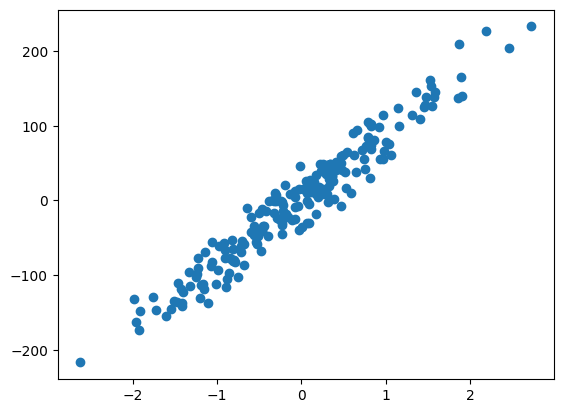

In [5]:
plt.scatter(X, Y)

In [6]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=42)

In [7]:
lr = LinearRegression()
lr.fit(Xtrain, Ytrain)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [8]:
pred = lr.predict(Xtest)

In [9]:
print("r2:", r2_score(Ytest, pred))
print("RSME", root_mean_squared_error(Ytest, pred))

r2: 0.9490420860581621
RSME 21.564177777613747


In [10]:
print("slope:", lr.coef_)
print("intercept:", lr.intercept_)

slope: [84.95332674]
intercept: 2.6620351774219912


In [21]:
r = Ridge(alpha=0.0000000001)

In [23]:
r.fit(Xtrain, Ytrain)
pred2 = r.predict(Xtest)
print("r2:", r2_score(Ytest, pred2))
print("RSME", root_mean_squared_error(Ytest, pred2))
print("slope:", r.coef_)
print("intercept:", r.intercept_)



r2: 0.9490420860580616
RSME 21.56417777763501
slope: [84.95332674]
intercept: 2.662035177420173


In [24]:
X.mean()

-0.04077096517208499

In [25]:
class apnaRidge():
    def __init__(self, alpha = 0.1):
        self.alpha  = alpha
        self.m = None
        self.b = None

    def fit(self,X, Y):
        num, den  =0
        for i in range(X.shape[0]):
            num+= (Y[i] - Y.mean())*(X[i]-X.mean())
            den += (X[i] - X.mean())**2
        self.m = num / (den + self.alpha)
        self.b = Y.mean() - self.m*X.mean()
    def predict(self, X):
        y  = self.m*X + self.b
